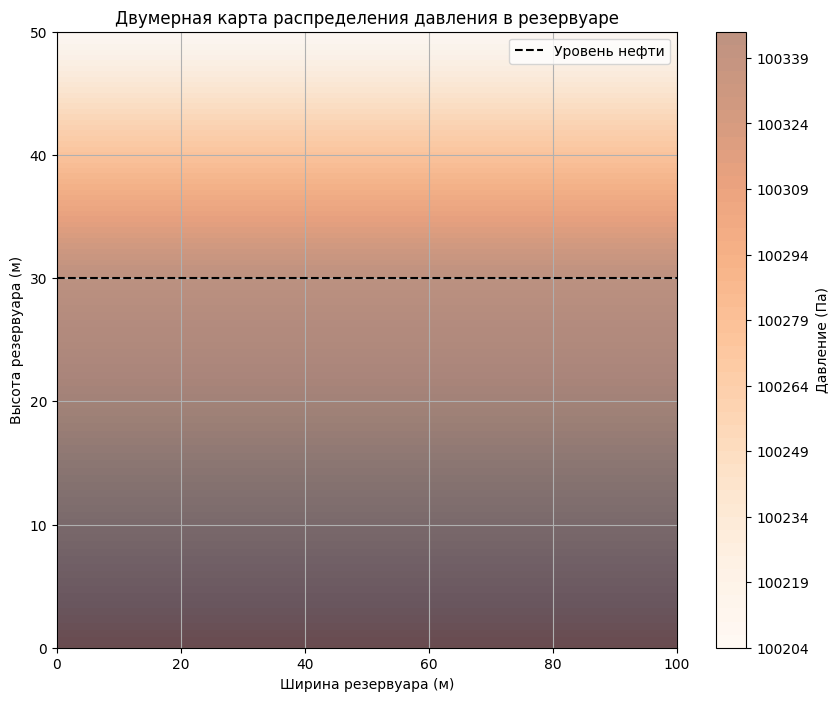

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры резервуара
width = 100  # ширина резервуара, м
height = 50  # высота резервуара, м

# Плотности компонентов
rho_oil = 850  # плотность нефти, кг/м³
rho_gas = 0.7  # плотность метана, кг/м³

# Ускорение свободного падения
g = 9.81  # м/с²

# Создание сетки координат
x = np.linspace(0, width, 100)
y = np.linspace(0, height, 100)
X, Y = np.meshgrid(x, y)

# Определение глубины для нефти и метана
depth_oil = np.where(Y <= height - 20, Y, height - 20)  # нефть на высоте до 20 м
depth_gas = np.where(Y > height - 20, Y - (height - 20), 0)  # метан выше уровня нефти

# Расчет давления
P0 = 1e5  # начальное давление на поверхности, Па
P_oil = P0 + rho_oil * g * (height - depth_oil)  # давление нефти
P_gas = P0 + rho_gas * g * (height - depth_gas)  # давление метана

# Создание карты давления
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, P_oil, levels=50, cmap='Blues', alpha=0.7)
plt.contourf(X, Y, P_gas, levels=50, cmap='Oranges', alpha=0.5)

plt.colorbar(label='Давление (Па)')
plt.title('Двумерная карта распределения давления в резервуаре')
plt.xlabel('Ширина резервуара (м)')
plt.ylabel('Высота резервуара (м)')
plt.axhline(y=height - 20, color='black', linestyle='--', label='Уровень нефти')
plt.legend()
plt.grid()
plt.show()